In [ ]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

import os

#Prevent TensorFlow from accessing the GPU (i.e. only use CPU); this must be done before importing TF
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.applications import inception_v3
from tensorflow.python.keras.applications import nasnet
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras._impl.keras.applications.imagenet_utils import decode_predictions

### Choose a Pretrained Model

In [ ]:
model_type = 0

model = None
img_dim = 229

if model_type == 1:
    img_dim = 224
    model = nasnet.NASNetMobile(weights='imagenet', include_top=True)
elif model_type == 2:
    img_dim = 331
    model = nasnet.NASNetLarge(weights='imagenet', include_top=True)
else:
    model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

### Image Recognition

In [3]:
def predict_img(model, img_path, img_dim):
    img = image.load_img(img_path, target_size=(img_dim, img_dim), interpolation='bilinear')

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)

    print('Input image shape:', x.shape)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds))
    
    return preds

In [4]:
image_dir = os.path.join('data', 'test-pretrained')

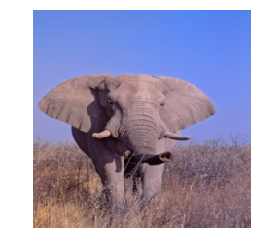

Input image shape: (1, 224, 224, 3)
Predicted: [[('n01496331', 'electric_ray', 0.10587911), ('n09256479', 'coral_reef', 0.09927744), ('n01917289', 'brain_coral', 0.080315165), ('n01990800', 'isopod', 0.025871899), ('n02504458', 'African_elephant', 0.016533049)]]
Prediction Score Vector Shape:  (1, 1000)


In [5]:
img_path = os.path.join(image_dir, 'africanelephant.jpg')
preds = predict_img(model, img_path, img_dim)
print('Prediction Score Vector Shape: ' , preds.shape)

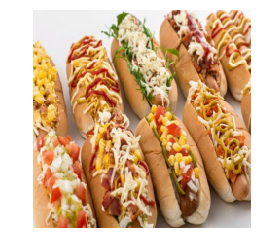

Input image shape: (1, 224, 224, 3)
Predicted: [[('n03065424', 'coil', 0.41981104), ('n03627232', 'knot', 0.102243066), ('n04599235', 'wool', 0.08445369), ('n07695742', 'pretzel', 0.029657822), ('n02869837', 'bonnet', 0.024538815)]]


In [6]:
img_path = os.path.join(image_dir, 'hotdog.jpg')
preds = predict_img(model, img_path, img_dim)

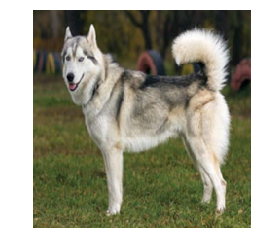

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02110185', 'Siberian_husky', 0.43366784), ('n02109961', 'Eskimo_dog', 0.38688073), ('n02110063', 'malamute', 0.07157447), ('n02091467', 'Norwegian_elkhound', 0.016746305), ('n02114367', 'timber_wolf', 0.004931101)]]


In [7]:
img_path = os.path.join(image_dir, 'siberianhusky.jpg')
preds = predict_img(model, img_path, img_dim)

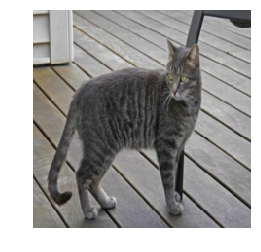

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02124075', 'Egyptian_cat', 0.88144267), ('n02123045', 'tabby', 0.0338632), ('n02123159', 'tiger_cat', 0.024549695), ('n02127052', 'lynx', 0.00632393), ('n02123597', 'Siamese_cat', 0.00090744597)]]


In [8]:
img_path = os.path.join(image_dir, 'tabby.jpg')
preds = predict_img(model, img_path, img_dim)

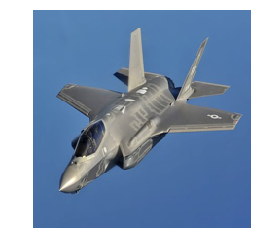

Input image shape: (1, 224, 224, 3)
Predicted: [[('n01494475', 'hammerhead', 0.42456424), ('n01484850', 'great_white_shark', 0.12288132), ('n01491361', 'tiger_shark', 0.104478754), ('n02640242', 'sturgeon', 0.030449914), ('n04552348', 'warplane', 0.010982153)]]


In [9]:
img_path = os.path.join(image_dir, 'warplane.jpg')
preds = predict_img(model, img_path, img_dim)